
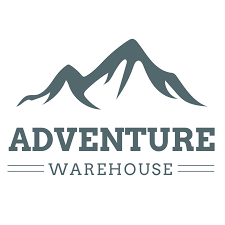

## <p style="background-color:white;font-family:newtimeroman;color:coral;font-size:230%;text-align:center;border-radius:20px 60px;">AHG Five Years Sales Forecasting</p>

This project focuses on forescasting sales for the next five years by analyzing data from Adventure Hardware Group's online platform and reseller network

# 

### <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Import Require Python Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
reseller_sales = pd.read_excel("Reseller_Sales.xlsx")
reseller_sales

,OrderDate,CustomerID,ProductID,SalesChannel,ProductSubcategoryName,ProductcategoryName,DaysToManufacture,ResellerQuantityOrdered,ResellerTotalCost,UnitPrice,ResellerRevenue,UnitPriceDiscount,StandardCost,ListPrice,ResellerProfit
0,2011-05-31,29672,762,Reseller,Road Bikes,Bikes,4,1,486.7066,419.4589,419.4589,0.00,486.7066,782.99,-67.2477
1,2011-05-31,29844,762,Reseller,Road Bikes,Bikes,4,1,486.7066,419.4589,419.4589,0.00,486.7066,782.99,-67.2477
2,2011-05-31,29759,762,Reseller,Road Bikes,Bikes,4,1,486.7066,419.4589,419.4589,0.00,486.7066,782.99,-67.2477
3,2011-05-31,29606,762,Reseller,Road Bikes,Bikes,4,1,486.7066,419.4589,419.4589,0.00,486.7066,782.99,-67.2477
4,2011-05-31,29849,762,Reseller,Road Bikes,Bikes,4,1,486.7066,419.4589,419.4589,0.00,486.7066,782.99,-67.2477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,2013-07-31,29877,965,Reseller,Touring Bikes,Bikes,4,1,461.4448,334.0575,334.0575,0.15,461.4448,742.35,-127.3873
60915,2013-07-31,29738,964,Reseller,Touring Bikes,Bikes,4,1,461.4448,334.0575,334.0575,0.15,461.4448,742.35,-127.3873
60916,2013-07-31,30082,960,Reseller,Touring Bikes,Bikes,4,1,461.4448,334.0575,334.0575,0.15,461.4448,742.35,-127.3873
60917,2013-07-31,30082,963,Reseller,Touring Bikes,Bikes,4,1,461.4448,334.0575,334.0575,0.15,461.4448,742.35,-127.3873


In [3]:
online_sales = pd.read_excel("Online_Sales.xlsx")
online_sales

,OrderDate,CustomerID,ProductID,SalesOrderID,SalesChannel,ProductSubcategoryName,ProductcategoryName,DaysToManufacture,OnlineQuantityOrdered,OnlineTotalCost,UnitPrice,OnlineRevenue,UnitPriceDiscount,StandardCost,ListPrice,OnlineProfit,SalesReasonsName,SalesReasonType
0,2013-05-30,11263,921,51184.0,Online,Tires and Tubes,Accessories,0,1,1.8663,4.9900,4.9900,0,1.8663,4.99,3.1237,Price,Other
1,2013-05-31,14066,921,51195.0,Online,Tires and Tubes,Accessories,0,1,1.8663,4.9900,4.9900,0,1.8663,4.99,3.1237,Price,Other
2,2013-06-01,11449,921,51217.0,Online,Tires and Tubes,Accessories,0,1,1.8663,4.9900,4.9900,0,1.8663,4.99,3.1237,Price,Other
3,2013-06-04,21534,921,51263.0,Online,Tires and Tubes,Accessories,0,1,1.8663,4.9900,4.9900,0,1.8663,4.99,3.1237,Price,Other
4,2013-06-04,11282,921,51264.0,Online,Tires and Tubes,Accessories,0,1,1.8663,4.9900,4.9900,0,1.8663,4.99,3.1237,Price,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70939,2013-05-25,27524,784,51030.0,Online,Mountain Bikes,Bikes,4,1,1251.9813,2049.0982,2049.0982,0,1251.9813,2294.99,797.1169,On Promotion,Promotion
70940,2013-05-26,27559,784,51038.0,Online,Mountain Bikes,Bikes,4,1,1251.9813,2049.0982,2049.0982,0,1251.9813,2294.99,797.1169,On Promotion,Promotion
70941,2013-05-26,12833,784,51045.0,Online,Mountain Bikes,Bikes,4,1,1251.9813,2049.0982,2049.0982,0,1251.9813,2294.99,797.1169,On Promotion,Promotion
70942,2013-05-26,15802,784,51049.0,Online,Mountain Bikes,Bikes,4,1,1251.9813,2049.0982,2049.0982,0,1251.9813,2294.99,797.1169,On Promotion,Promotion


In [4]:
online_sales.describe()

,CustomerID,ProductID,SalesOrderID,DaysToManufacture,OnlineQuantityOrdered,OnlineTotalCost,UnitPrice,OnlineRevenue,UnitPriceDiscount,StandardCost,ListPrice,OnlineProfit
count,70944.000000,70944.000000,64515.000000,70944.000000,70944.0,70944.000000,70944.000000,70944.000000,70944.0,70944.000000,70944.000000,70944.000000
mean,18911.253045,851.829725,62052.532434,1.057115,1.0,320.444968,532.604268,532.604268,0.0,320.444968,540.057342,212.159299
std,5443.195091,85.619807,7961.756621,1.763806,0.0,607.109244,1001.492256,1001.492256,0.0,607.109244,1012.927201,398.109193
min,11000.000000,707.000000,43697.000000,0.000000,1.0,0.856500,2.290000,2.290000,0.0,0.856500,2.290000,1.433500
25%,14046.000000,781.000000,55933.000000,0.000000,1.0,3.362300,8.990000,8.990000,0.0,3.362300,8.990000,3.123700
50%,18240.000000,872.000000,62322.000000,0.000000,1.0,11.216300,29.990000,29.990000,0.0,11.216300,29.990000,15.643700
75%,23500.250000,922.000000,68704.500000,4.000000,1.0,343.649600,539.990000,539.990000,0.0,343.649600,539.990000,196.340400
max,29483.000000,999.000000,75123.000000,4.000000,1.0,2171.294200,3578.270000,3578.270000,0.0,2171.294200,3578.270000,1487.835600


In [5]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OrderDate               70944 non-null  datetime64[ns]
 1   CustomerID              70944 non-null  int64         
 2   ProductID               70944 non-null  int64         
 3   SalesOrderID            64515 non-null  float64       
 4   SalesChannel            70944 non-null  object        
 5   ProductSubcategoryName  70944 non-null  object        
 6   ProductcategoryName     70944 non-null  object        
 7   DaysToManufacture       70944 non-null  int64         
 8   OnlineQuantityOrdered   70944 non-null  int64         
 9   OnlineTotalCost         70944 non-null  float64       
 10  UnitPrice               70944 non-null  float64       
 11  OnlineRevenue           70944 non-null  float64       
 12  UnitPriceDiscount       70944 non-null  int64 

In [6]:
online_sales.isnull().sum()

OrderDate                    0
CustomerID                   0
ProductID                    0
SalesOrderID              6429
SalesChannel                 0
ProductSubcategoryName       0
ProductcategoryName          0
DaysToManufacture            0
OnlineQuantityOrdered        0
OnlineTotalCost              0
UnitPrice                    0
OnlineRevenue                0
UnitPriceDiscount            0
StandardCost                 0
ListPrice                    0
OnlineProfit                 0
SalesReasonsName          6429
SalesReasonType           6429
dtype: int64

#
### <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Data Clearning</p>

In [7]:
# Reset index after drop
online_sales=online_sales.dropna().reset_index(drop=True)

In [8]:
online_sales.isnull().sum()

OrderDate                 0
CustomerID                0
ProductID                 0
SalesOrderID              0
SalesChannel              0
ProductSubcategoryName    0
ProductcategoryName       0
DaysToManufacture         0
OnlineQuantityOrdered     0
OnlineTotalCost           0
UnitPrice                 0
OnlineRevenue             0
UnitPriceDiscount         0
StandardCost              0
ListPrice                 0
OnlineProfit              0
SalesReasonsName          0
SalesReasonType           0
dtype: int64

In [9]:
online_sales.describe()

,CustomerID,ProductID,SalesOrderID,DaysToManufacture,OnlineQuantityOrdered,OnlineTotalCost,UnitPrice,OnlineRevenue,UnitPriceDiscount,StandardCost,ListPrice,OnlineProfit
count,64515.000000,64515.000000,64515.000000,64515.000000,64515.0,64515.000000,64515.000000,64515.000000,64515.0,64515.000000,64515.000000,64515.000000
mean,18807.638782,855.312749,62052.532434,0.889158,1.0,284.566249,478.284609,478.284609,0.0,284.566249,482.403484,193.718359
std,5432.230323,84.279887,7961.756621,1.663151,0.0,593.088766,983.872350,983.872350,0.0,593.088766,990.977201,392.834035
min,11000.000000,707.000000,43697.000000,0.000000,1.0,0.856500,2.290000,2.290000,0.0,0.856500,2.290000,1.433500
25%,13960.000000,782.000000,55933.000000,0.000000,1.0,1.866300,4.990000,4.990000,0.0,1.866300,4.990000,3.123700
50%,18081.000000,873.000000,62322.000000,0.000000,1.0,9.346300,24.990000,24.990000,0.0,9.346300,24.990000,13.759500
75%,23330.000000,922.000000,68704.500000,0.000000,1.0,41.572300,63.500000,63.500000,0.0,41.572300,63.500000,39.751000
max,29483.000000,999.000000,75123.000000,4.000000,1.0,2171.294200,3578.270000,3578.270000,0.0,2171.294200,3578.270000,1406.975800


In [10]:
online_sales = online_sales[['OrderDate','OnlineRevenue']]
online_sales

,OrderDate,OnlineRevenue
0,2013-05-30,4.9900
1,2013-05-31,4.9900
2,2013-06-01,4.9900
3,2013-06-04,4.9900
4,2013-06-04,4.9900
...,...,...
64510,2013-05-25,2049.0982
64511,2013-05-26,2049.0982
64512,2013-05-26,2049.0982
64513,2013-05-26,2049.0982


In [11]:
online_sales.OrderDate = pd.to_datetime(online_sales.OrderDate)
online_sales.sort_values(by='OrderDate', ascending = True, inplace = True)
online_sales.reset_index(drop = True, inplace = True)


In [12]:
a = online_sales.sort_values(by='OnlineRevenue', ascending = True)
a.head(4)

,OrderDate,OnlineRevenue
19053,2013-09-30,2.29
50480,2014-04-01,2.29
46088,2014-03-08,2.29
56102,2014-05-01,2.29


In [13]:
online_sales = online_sales[online_sales['OnlineRevenue'] > 130]
online_sales

,OrderDate,OnlineRevenue
0,2011-05-31,3578.27
1,2011-05-31,3578.27
2,2011-06-01,3578.27
3,2011-06-01,3578.27
4,2011-06-01,3578.27
...,...,...
63845,2014-06-22,159.00
64049,2014-06-25,159.00
64077,2014-06-25,159.00
64078,2014-06-25,159.00


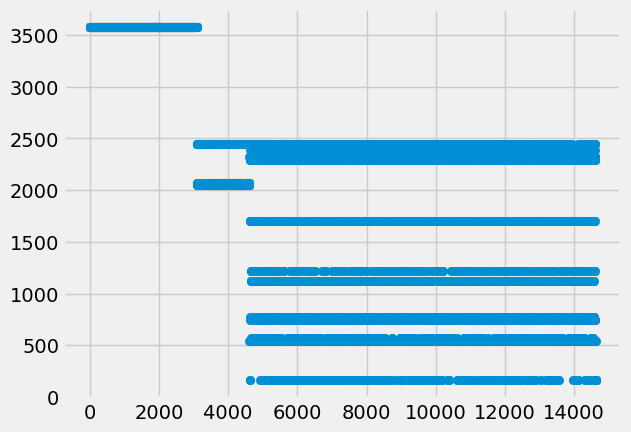

In [14]:
plt.scatter(x = range(online_sales.shape[0]), y = online_sales['OnlineRevenue'])
plt.show()

[]

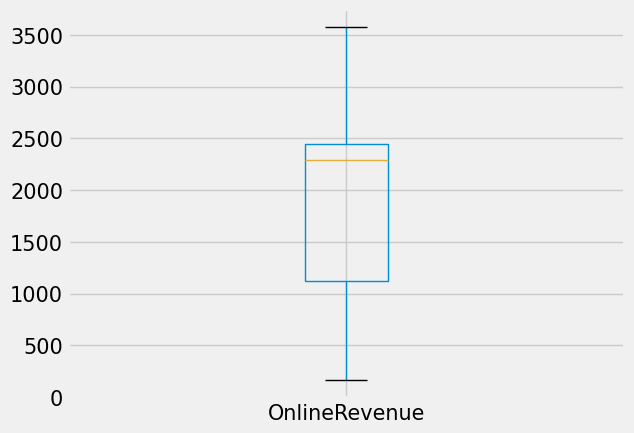

In [15]:
b_plot = online_sales.boxplot(column = 'OnlineRevenue', fontsize = 15) 
b_plot.plot() 


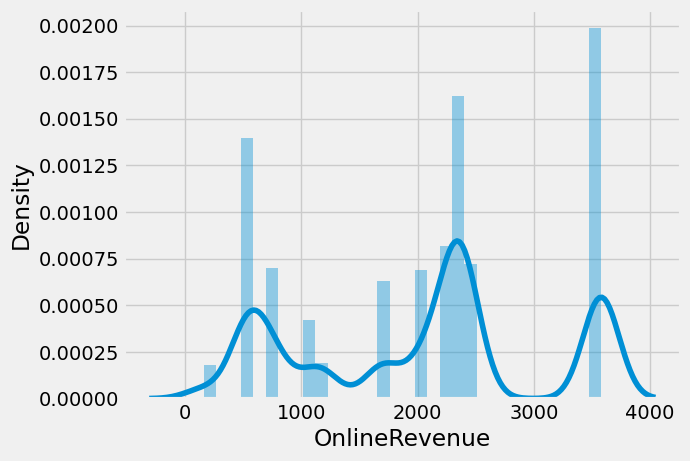

In [16]:
sns.distplot(online_sales['OnlineRevenue'])
plt.show()

In [17]:
monthlySales = online_sales.copy()

In [18]:
monthlySales['OrderDate'] = monthlySales['OrderDate'].dt.to_period('M')

In [19]:
monthlySales = monthlySales.groupby(['OrderDate']).sum()

In [20]:
online_sales = online_sales.groupby(['OrderDate']).sum()
# online_sales = online_sales.set_index('OrderDate')


In [21]:
online_sales

,OnlineRevenue
OrderDate,
2011-05-31,7156.54
2011-06-01,14313.08
2011-06-02,28626.16
2011-06-03,14313.08
2011-06-04,28626.16
...,...
2014-06-13,159.00
2014-06-19,159.00
2014-06-22,159.00


# 
## <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Dataset Visualizations</p>

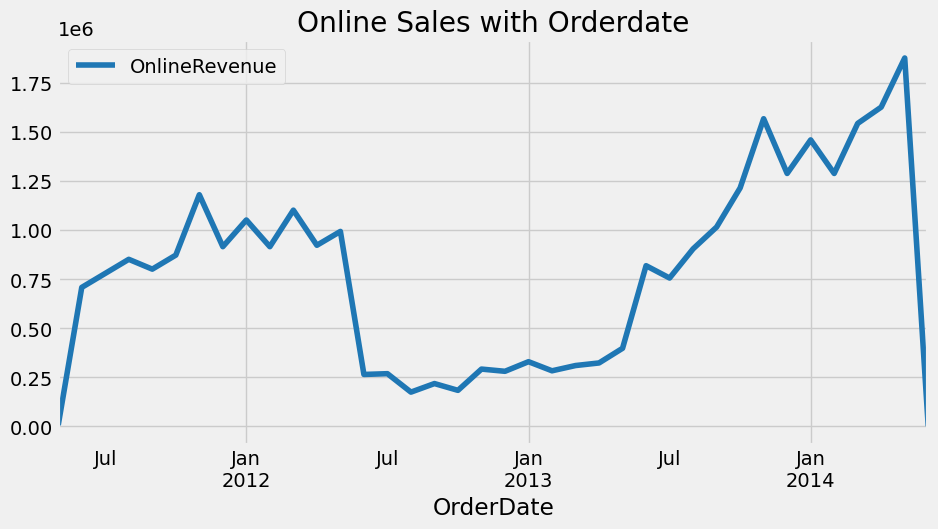

In [22]:
monthlySales.plot(
        figsize=(10, 5),
        color=color_pal[0],
        title='Online Sales with Orderdate')
plt.show()

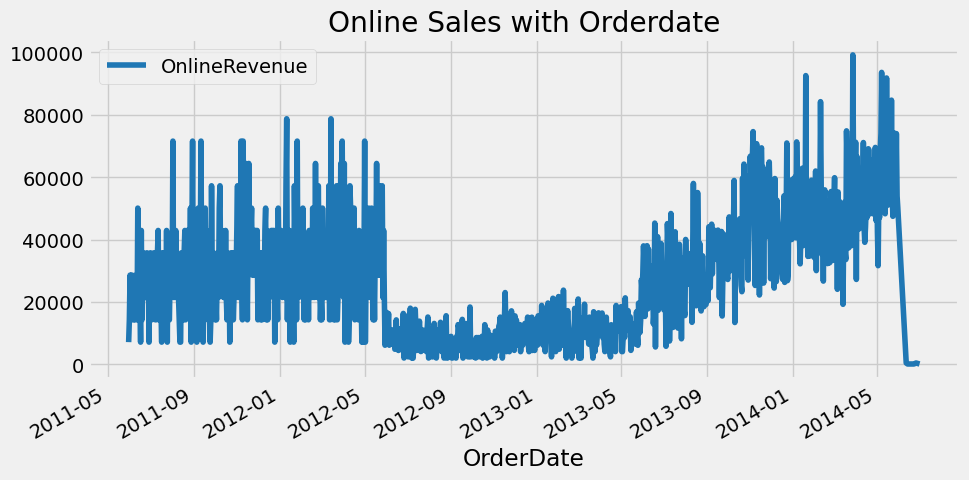

In [23]:
online_sales.plot(
        figsize=(10, 5),
        color=color_pal[0],
        title='Online Sales with Orderdate')
plt.show()

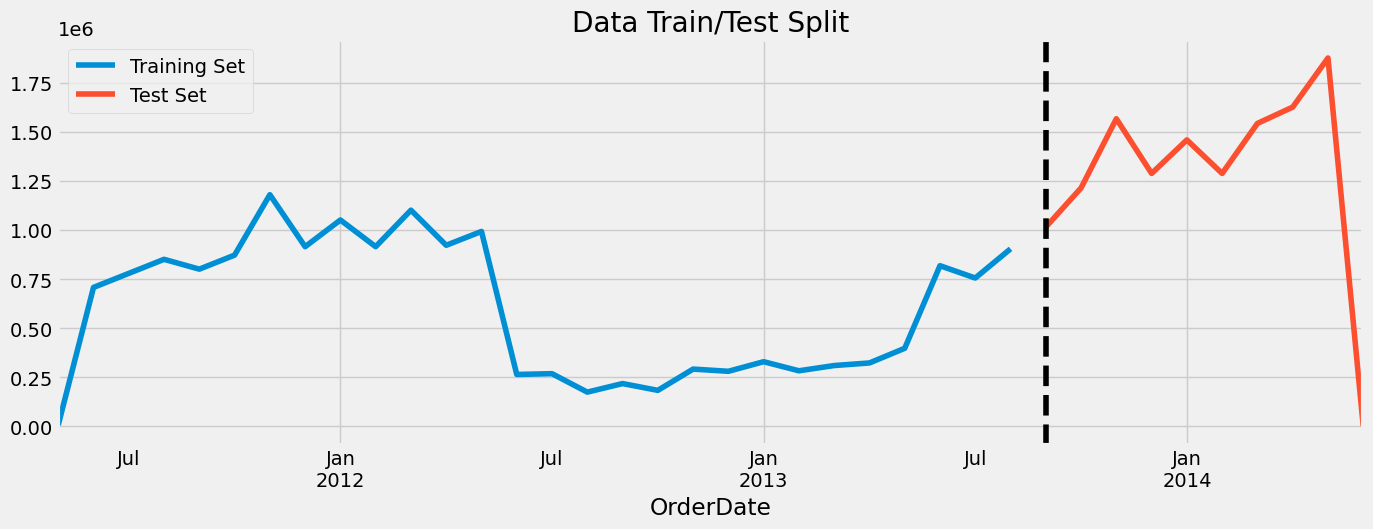

In [24]:
sales_train = monthlySales.loc[monthlySales.index < '2013-9-30']
sales_test = monthlySales.loc[monthlySales.index >= '2013-9-30']

fig, ax = plt.subplots(figsize=(15, 5))
sales_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
sales_test.plot(ax=ax, label='Test Set')
ax.axvline('2013-9-30', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

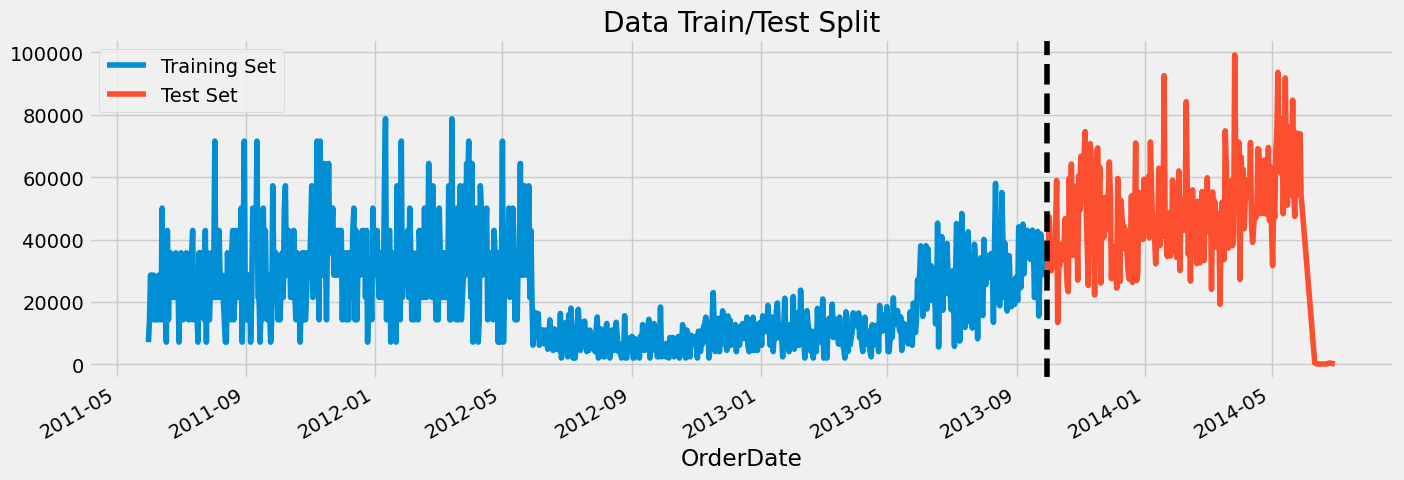

In [25]:
sales_train = online_sales.loc[online_sales.index < '2013-9-30']
sales_test = online_sales.loc[online_sales.index >= '2013-9-30']

fig, ax = plt.subplots(figsize=(15, 5))
sales_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
sales_test.plot(ax=ax, label='Test Set')
ax.axvline('2013-9-30', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [26]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['monthlysales'] = df.index.to_period('M')
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

online_sales= create_features(online_sales)

In [27]:
online_sales

,OnlineRevenue,monthlysales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
OrderDate,,,,,,,,,
2011-05-31,7156.54,2011-05,1,2,5,2011,151,31,22
2011-06-01,14313.08,2011-06,2,2,6,2011,152,1,22
2011-06-02,28626.16,2011-06,3,2,6,2011,153,2,22
2011-06-03,14313.08,2011-06,4,2,6,2011,154,3,22
2011-06-04,28626.16,2011-06,5,2,6,2011,155,4,22
...,...,...,...,...,...,...,...,...,...
2014-06-13,159.00,2014-06,4,2,6,2014,164,13,24
2014-06-19,159.00,2014-06,3,2,6,2014,170,19,25
2014-06-22,159.00,2014-06,6,2,6,2014,173,22,25


# 
## <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Visualize our Feature / Target Relationship</p>

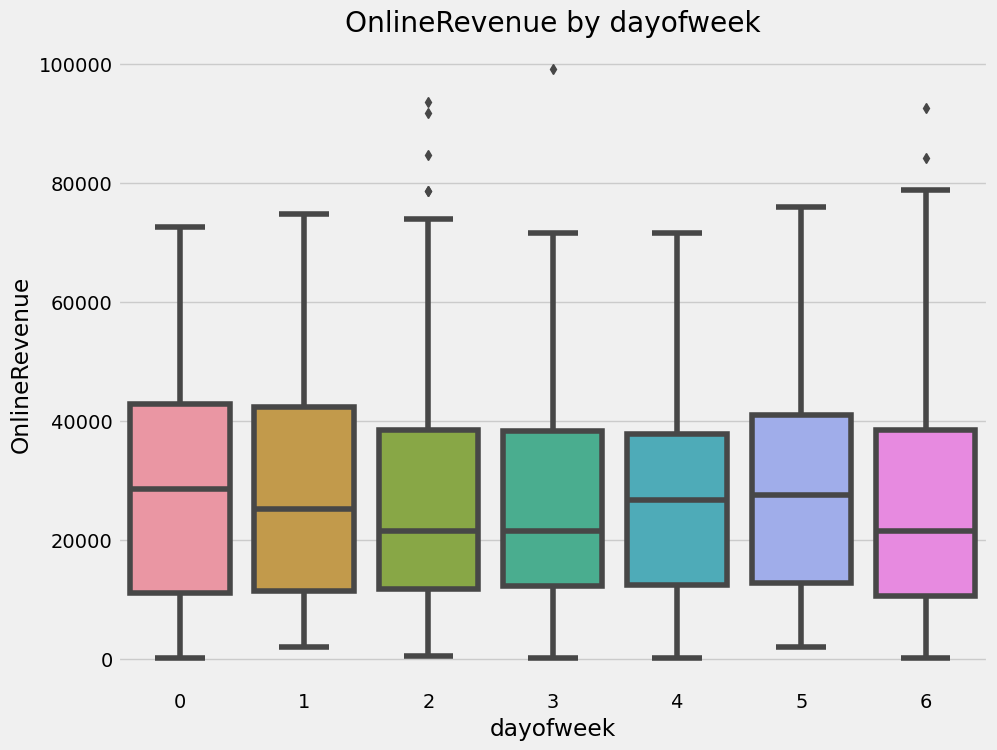

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=online_sales, x='dayofweek', y='OnlineRevenue')
ax.set_title('OnlineRevenue by dayofweek')
plt.show()

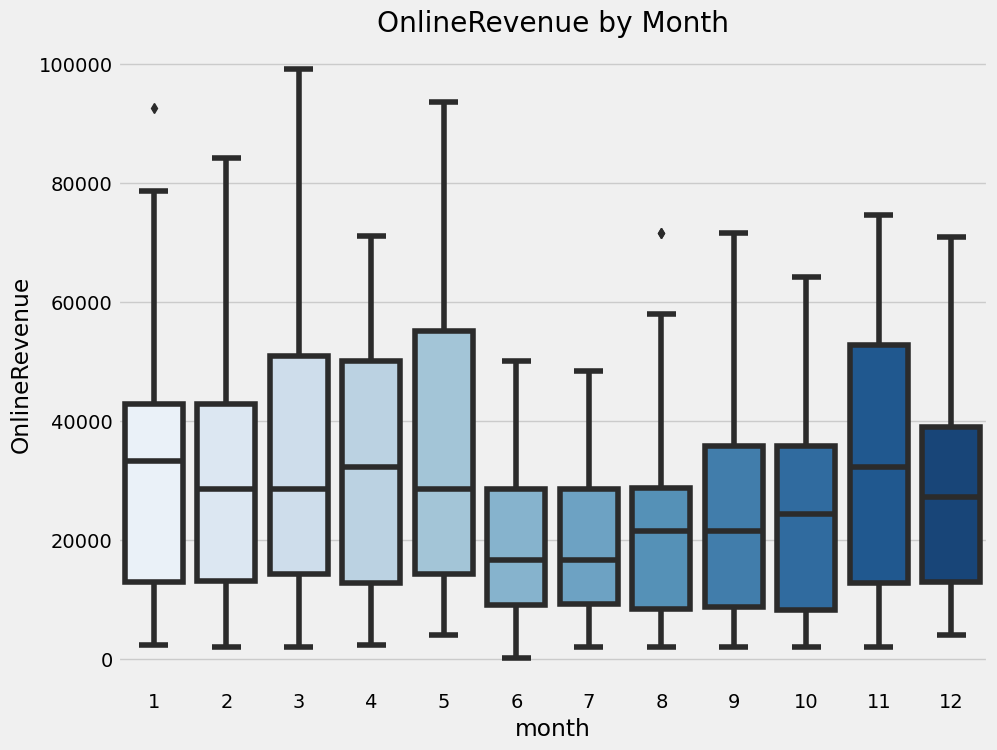

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=online_sales, x='month', y='OnlineRevenue', palette='Blues')
ax.set_title('OnlineRevenue by Month')
plt.show()

# 
## <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Create our Model</p>

In [30]:
FEATURES = ['dayofyear','dayofweek', 'quarter', 'month', 'year']
TARGET = 'OnlineRevenue'

In [31]:
FEATURES = online_sales[FEATURES]
TARGET = online_sales[TARGET]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(FEATURES, TARGET, test_size = 0.2, random_state = 42 )

In [33]:
# l_regr = LinearRegression()
# l_regr.fit(X_train, y_train)

In [34]:
# reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
#                        n_estimators=4000,
#                        early_stopping_rounds=50,
#                        objective='reg:linear',
#                        max_depth=4,
#                        learning_rate=0.05)
# reg.fit(X_train, y_train, verbose=100)

In [35]:
r_reg = RandomForestRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=3, max_features='sqrt', max_depth=20, bootstrap=True)
r_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=500)

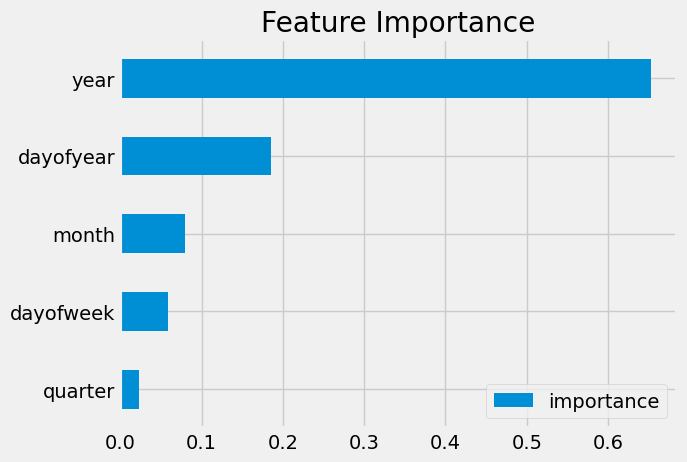

In [36]:
fi = pd.DataFrame(data=r_reg.feature_importances_,
             index=r_reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# 
## <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Forecast on Test</p>

In [37]:
sales_train = online_sales.loc[online_sales.index < '2013-9-30']
sales_test = online_sales.loc[online_sales.index >= '2013-9-30']

In [38]:
sales_train = create_features(sales_train)
sales_test = create_features(sales_test)

In [39]:
FEATURES = ['dayofyear','dayofweek', 'quarter', 'month', 'year']
salestest = sales_test[FEATURES]
salestest.head(3)

,dayofyear,dayofweek,quarter,month,year
OrderDate,,,,,
2013-09-30,273,0,3,9,2013
2013-10-01,274,1,4,10,2013
2013-10-02,275,2,4,10,2013


In [40]:
sales_test.head(2)

,OnlineRevenue,monthlysales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
OrderDate,,,,,,,,,
2013-09-30,27227.12,2013-09,0,3,9,2013,273,30,40
2013-10-01,35812.90,2013-10,1,4,10,2013,274,1,40


In [41]:
Onlinerevenue = online_sales['OnlineRevenue']

In [42]:
sales_test['prediction'] = r_reg.predict(salestest)
sales_test.head(4)

,OnlineRevenue,monthlysales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
OrderDate,,,,,,,,,,
2013-09-30,27227.12,2013-09,0,3,9,2013,273,30,40,31766.672527
2013-10-01,35812.90,2013-10,1,4,10,2013,274,1,40,35212.733178
2013-10-02,47279.87,2013-10,2,4,10,2013,275,2,40,36413.562491
2013-10-03,30570.79,2013-10,3,4,10,2013,276,3,40,34315.234956


In [43]:
Salestest = sales_test['prediction']

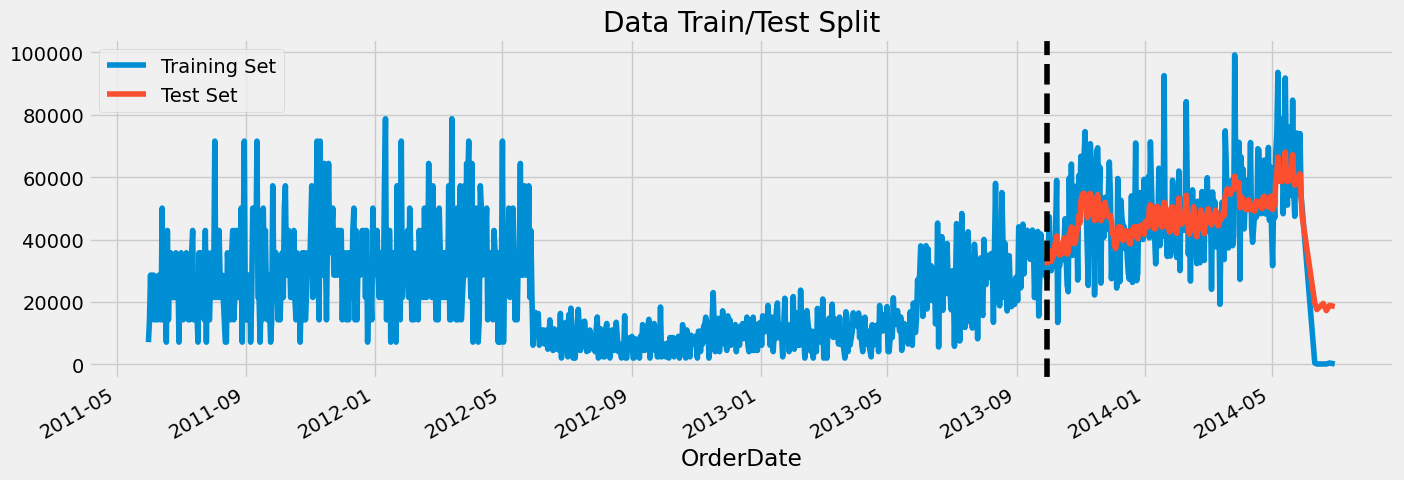

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
Onlinerevenue.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
Salestest.plot(ax=ax, label='Test Set')
ax.axvline('2013-9-30', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [45]:
online_sales = online_sales.groupby(['monthlysales']).sum()

In [46]:
Onlinemonthly = online_sales['OnlineRevenue']

In [47]:
sales_test = sales_test.groupby(['monthlysales']).sum()

In [48]:
Salestest = sales_test['prediction']

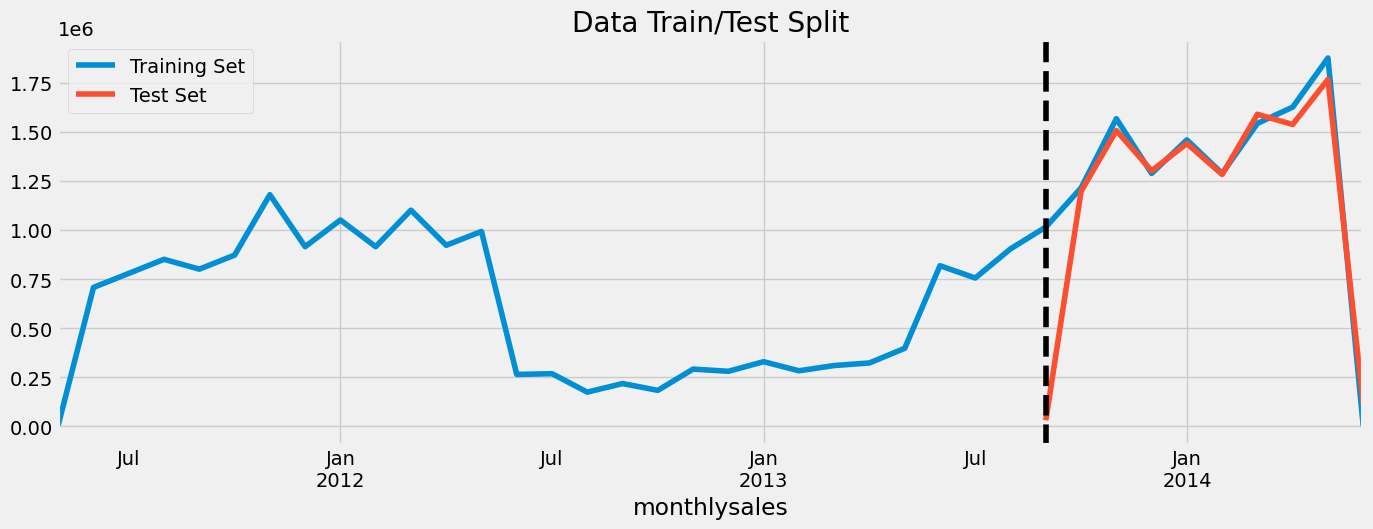

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))
Onlinemonthly.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
Salestest.plot(ax=ax, label='Test Set')
ax.axvline('2013-9-30', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# 
## <p style="background-color:white;font-family:newtimeroman;color:brown;font-size:110%;">Forecast on Five years Generated Date Dataset</p>

In [50]:
test_foresc = pd.DataFrame(pd.date_range('2014-01-26', periods=1440, freq='D') + pd.DateOffset(days=26), columns=['OrderDate'])
test_foresc

,OrderDate
0,2014-02-21
1,2014-02-22
2,2014-02-23
3,2014-02-24
4,2014-02-25
...,...
1435,2018-01-26
1436,2018-01-27
1437,2018-01-28
1438,2018-01-29


In [51]:
test_foresc = test_foresc.groupby('OrderDate').sum()

In [52]:
test_foresc.head(3)

""
OrderDate
2014-02-21
2014-02-22
2014-02-23


In [53]:
fiveyears_forescasting = create_features(test_foresc)

In [54]:
fiveyears_forescasting.head(3)

,monthlysales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
OrderDate,,,,,,,,
2014-02-21,2014-02,4,1,2,2014,52,21,8
2014-02-22,2014-02,5,1,2,2014,53,22,8
2014-02-23,2014-02,6,1,2,2014,54,23,8


In [55]:
FEATURES = ['dayofyear','dayofweek', 'quarter', 'month', 'year']
fiveyears_forescast = fiveyears_forescasting[FEATURES]

In [56]:
fiveyears_forescasting['forescast_Revenue'] = r_reg.predict(fiveyears_forescast)
fiveyears_forescasting.head(5)

,monthlysales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,forescast_Revenue
OrderDate,,,,,,,,,
2014-02-21,2014-02,4,1,2,2014,52,21,8,43510.243522
2014-02-22,2014-02,5,1,2,2014,53,22,8,44292.929774
2014-02-23,2014-02,6,1,2,2014,54,23,8,49496.489437
2014-02-24,2014-02,0,1,2,2014,55,24,9,46758.703410
2014-02-25,2014-02,1,1,2,2014,56,25,9,43379.927461


In [57]:
fiveyearsforescast = fiveyears_forescasting['forescast_Revenue']

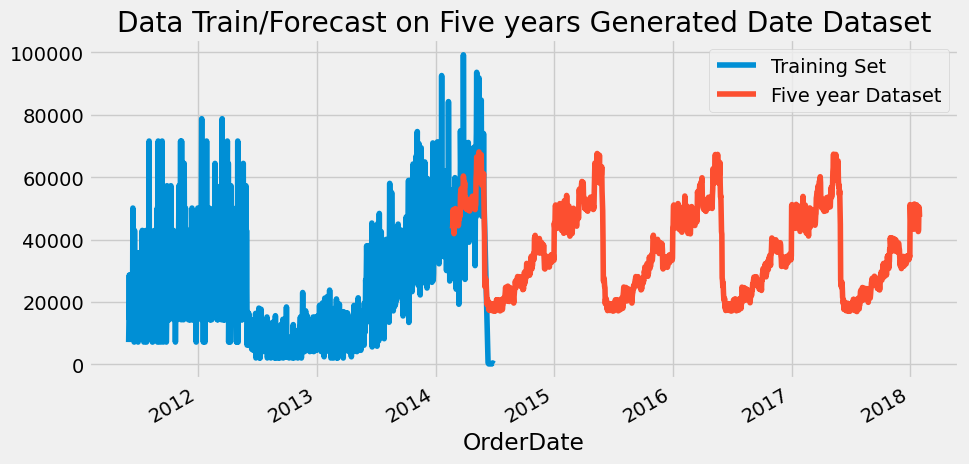

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
Onlinerevenue.plot(ax=ax, label='Training Set', title='Data Train/Forecast on Five years Generated Date Dataset')
fiveyearsforescast.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Five year Dataset'])
plt.show()

In [59]:
fiveyears_forescasting 

,monthlysales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,forescast_Revenue
OrderDate,,,,,,,,,
2014-02-21,2014-02,4,1,2,2014,52,21,8,43510.243522
2014-02-22,2014-02,5,1,2,2014,53,22,8,44292.929774
2014-02-23,2014-02,6,1,2,2014,54,23,8,49496.489437
2014-02-24,2014-02,0,1,2,2014,55,24,9,46758.703410
2014-02-25,2014-02,1,1,2,2014,56,25,9,43379.927461
...,...,...,...,...,...,...,...,...,...
2018-01-26,2018-01,4,1,1,2018,26,26,4,42560.923643
2018-01-27,2018-01,5,1,1,2018,27,27,4,43129.535161
2018-01-28,2018-01,6,1,1,2018,28,28,4,50451.617069


In [60]:
fiveyears_forescasting = fiveyears_forescasting.groupby(['monthlysales']).sum()

In [61]:
fiveyears_forescas = fiveyears_forescasting['forescast_Revenue']

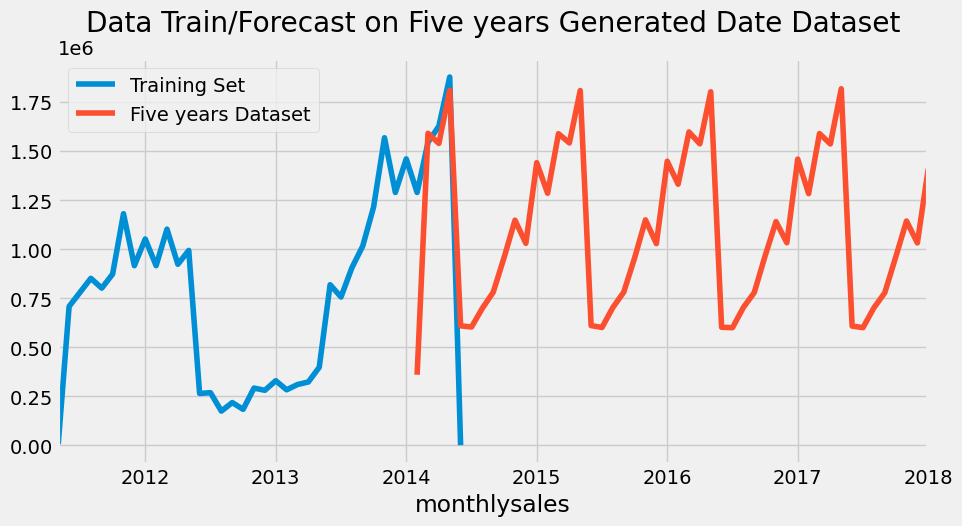

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
Onlinemonthly.plot(ax=ax, label='Training Set', title='Data Train/Forecast on Five years Generated Date Dataset')
fiveyears_forescas.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Five years Dataset'])
plt.show()

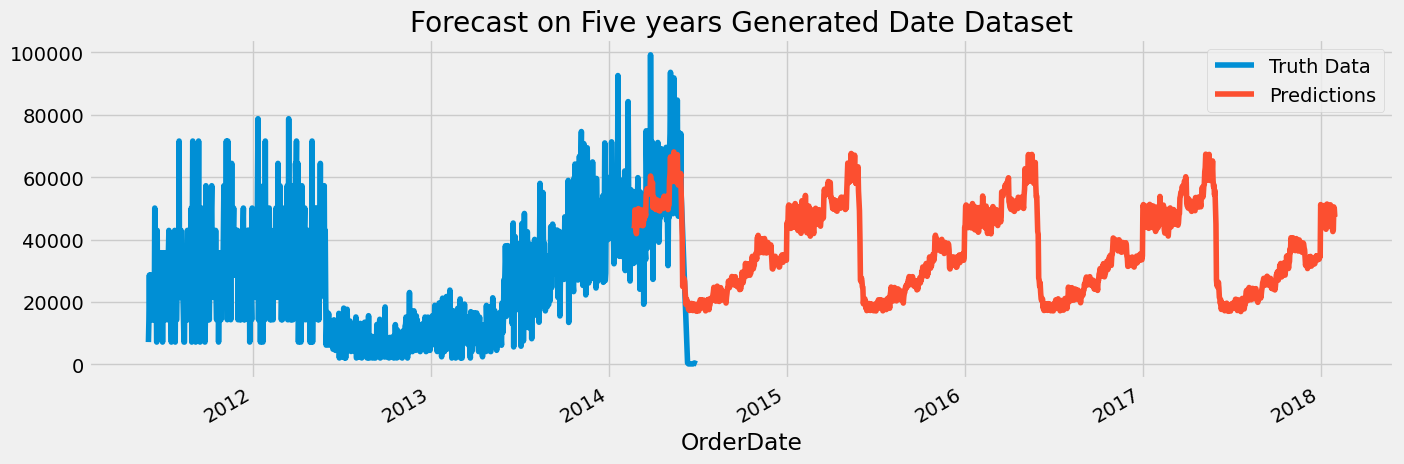

In [63]:
# fiveyears_forescasting['forescast_Revenue'] = reg.predict(fiveyears_forescast)
ax = Onlinerevenue.plot(figsize=(15, 5))
fiveyearsforescast.plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Forecast on Five years Generated Date Dataset')
plt.show()

In [64]:
###################################
# Import libaries and create model function
##################################
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def Model(model):
    model.fit(X_train,y_train)
#     score = model.score(X_test, y_test)
    regr_predicted = model.predict(X_test)
    MSE=mean_squared_error(y_test, regr_predicted)
    MAE=mean_absolute_error(y_test, regr_predicted)
    r2=r2_score(y_test, regr_predicted)
    RMSE = np.sqrt(MSE)
    print("R squared value:           ", r2)
    print("Root Mean Squared Error :  ", RMSE)
    print("Mean Absolute Error :      ", MAE)
    print("score on train: "+ str(model.score(X_train, y_train)))
    print("score on test: " + str(model.score(X_test, y_test)))

In [65]:
Model(r_reg)

R squared value:            0.5108187628742429
Root Mean Squared Error :   13499.305186005584
Mean Absolute Error :       10190.898908954083
score on train: 0.7514073416116841
score on test: 0.5108187628742429
